<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/06_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6.10 Clustering
Clustering or unsuprvised classification is used to make groups of data without the help of any training data. These groups might not be able to differentiate between the physical groups e.g. different typs of crops. If we want to use clustering to seperate out the physical features, we need to look for the sensitive indices for that particular physicall differentiation.
We will be using EVI indices to seperate out the forest and rest of the area.

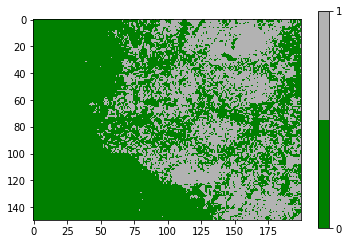

In [15]:
from google.colab import drive
from osgeo import gdal
import matplotlib.pyplot as plt
from sklearn import cluster
from matplotlib import colors

#drive.mount("/content/gdrive")


# read the banda 2 raster data
driver = gdal.GetDriverByName('GTiff')
file_name = "/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/band2.tif"
dataset = gdal.Open(file_name, gdal.GA_ReadOnly)
geotransform = dataset.GetGeoTransform()
projection = dataset.GetProjection()
band2 = dataset.GetRasterBand(1).ReadAsArray()
dataset = None

# read the banda 3 raster data
driver = gdal.GetDriverByName('GTiff')
file_name = "/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/band3.tif"
dataset = gdal.Open(file_name, gdal.GA_ReadOnly)
geotransform = dataset.GetGeoTransform()
projection = dataset.GetProjection()
band3 = dataset.GetRasterBand(1).ReadAsArray()
dataset = None

L = 1
C1 = 1
G = 2.5

evi = G*(band3-band2)/(band3+C1*band2+L)

data = evi.reshape(150*200,1)
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(data)
foo = k_means.labels_.reshape(150, 200)

cmap = colors.ListedColormap(['green', '0.7'])
bounds=[0,1,2]
norm = colors.BoundaryNorm(bounds, cmap.N)

plt.imshow(foo, cmap=cmap)
plt.colorbar(ticks=[0, 1])
plt.show()

Green colour denotes the forest part and grey colour depicts the other LULC.